In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [107]:
data = pd.read_csv("calories-data.csv")
data.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
926,39,Male,102.3,1.94,192,134,50,0.89,656.0,Yoga,22.9,2.4,3,1,27.18
379,49,Male,77.7,1.61,160,158,50,1.03,806.0,Strength,26.7,3.4,3,2,29.98
290,55,Female,42.9,1.69,186,140,56,0.90,567.0,Yoga,34.7,2.4,2,1,15.02
571,48,Male,114.9,1.86,175,141,56,1.36,949.0,Cardio,21.1,3.6,3,1,33.21
101,25,Female,41.2,1.62,193,144,64,1.49,1073.0,Yoga,28.9,2.1,4,2,15.70
596,38,Female,49.7,1.51,179,145,65,1.25,906.0,HIIT,32.6,2.5,3,1,21.80
863,45,Male,80.8,1.76,183,131,54,1.70,1102.0,Yoga,11.4,3.5,4,3,26.08
558,46,Male,59.4,1.68,165,147,62,1.16,844.0,Strength,20.2,2.5,4,2,21.05
883,29,Female,49.0,1.57,168,132,53,1.33,878.0,Yoga,26.5,2.6,3,2,19.88
464,30,Male,67.9,1.75,180,168,67,1.25,1155.0,Yoga,29.1,3.1,2,1,22.17


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [109]:
data.isnull().count()

Age                              973
Gender                           973
Weight (kg)                      973
Height (m)                       973
Max_BPM                          973
Avg_BPM                          973
Resting_BPM                      973
Session_Duration (hours)         973
Calories_Burned                  973
Workout_Type                     973
Fat_Percentage                   973
Water_Intake (liters)            973
Workout_Frequency (days/week)    973
Experience_Level                 973
BMI                              973
dtype: int64

In [110]:
data['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

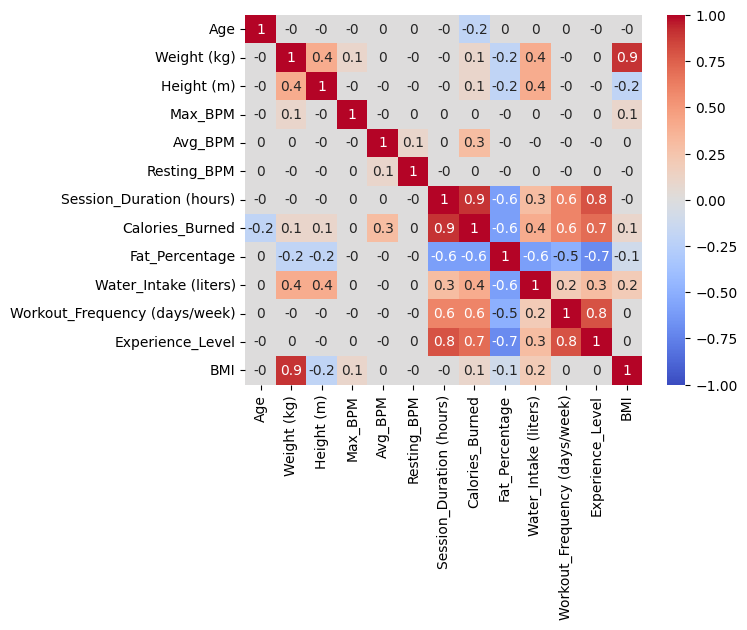

In [111]:
import seaborn as sns
sns.heatmap(data.drop(axis=1,columns=["Gender","Workout_Type"]).corr().round(1), annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

- height , weight could be used directly in BMI
- BPM shows almost no significant relation with other features
- experience level highly affects session duration to can be eliminated
- water intake doesn't have to do much with calories burnt in real world , so could be ignored
- fat percentage column seems to show wrong relation with bmi, as fat % is expected to show strong positive relation with bmi but is showing a slight negative relation. so it have to be droped

#### Eliminating less relevent Data

In [112]:
data_new = data.drop(axis=1,columns=["Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Fat_Percentage","Water_Intake (liters)","Experience_Level"])
data_new.sample(6)

,Age,Gender,Session_Duration (hours),Calories_Burned,Workout_Type,Workout_Frequency (days/week),BMI
658,43,Female,0.82,502.0,Strength,2,21.00
578,56,Female,1.29,848.0,Strength,2,17.51
288,39,Male,1.10,938.0,Strength,4,32.32
540,52,Female,1.27,794.0,Cardio,4,28.52
609,48,Male,1.81,1398.0,Strength,5,28.12
427,53,Male,0.69,444.0,Cardio,3,31.04


#### Detecting Outliers

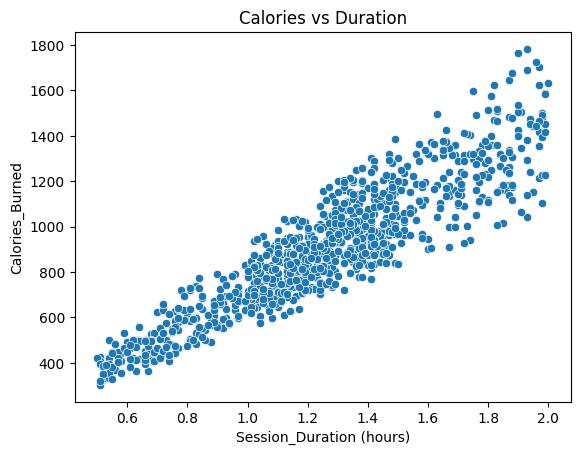

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data_new['Session_Duration (hours)'], y=data_new['Calories_Burned'])
plt.title("Calories vs Duration")
plt.show()



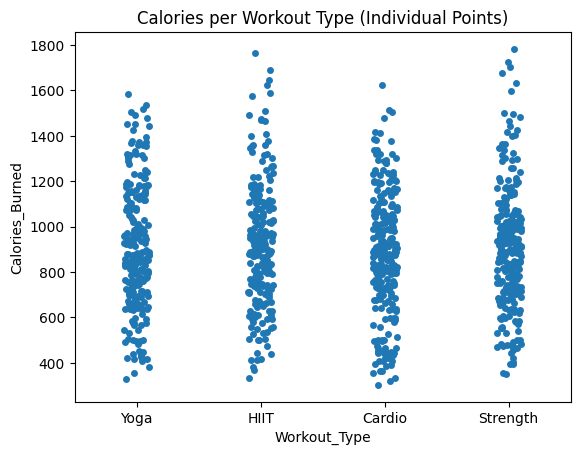

In [114]:
#sns.scatterplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', style='Workout_Type', s=100)

sns.stripplot(data=data_new, x='Workout_Type', y='Calories_Burned', jitter=True)
plt.title('Calories per Workout Type (Individual Points)')
plt.show()

In [115]:
data_new['BMI'].describe()


count    973.000000
mean      24.912127
std        6.660879
min       12.320000
25%       20.110000
50%       24.160000
75%       28.560000
max       49.840000
Name: BMI, dtype: float64

-BMI Range between 12 to 50 is usually normal for humans

In [116]:
x = data_new.drop(axis=1,columns=["Calories_Burned"])
y = data_new["Calories_Burned"]

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [118]:
x_train.sample(5)

,Age,Gender,Session_Duration (hours),Workout_Type,Workout_Frequency (days/week),BMI
224,50,Male,1.46,Strength,3,32.69
951,49,Male,1.14,Cardio,2,16.01
147,59,Male,1.07,Strength,3,13.23
289,47,Male,1.37,Strength,4,24.25
416,31,Male,1.49,HIIT,4,26.95


### Preprocessing with Transformers

In [119]:
trf1 = ColumnTransformer([
    ('cat_encode',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),[1,3])
],remainder='passthrough')

In [120]:
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(4,8))
],remainder='passthrough')

#### Creating Data preprocessing pipeline

In [121]:
data_pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

#### Preprocessing the data

In [122]:
x_train_final = data_pipe.fit_transform(x_train)
x_test_final = data_pipe.fit_transform(x_test)
x_train_final.shape

(778, 8)

In [123]:
y_train.shape

(778,)

### Testing different Algorithm on the data

##### Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_final,y_train)
lr.coef_

array([-39.33179399, 249.8007346 ,  -2.1065492 ,   6.01455366,
        89.37964196,  -3.9784282 ,  -2.41047089,  -8.4628255 ])

In [125]:
y_pred = lr.predict(x_test_final)

In [126]:
r2_score(y_test,y_pred)

0.8660263150912134

#### Polynomial Regression

In [127]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train_final)
x_test_poly = poly.fit_transform(x_test_final)

In [128]:
polyreg = LinearRegression()
polyreg.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [129]:
r2_score(y_test,polyreg.predict(x_test_poly))

0.8602951549325522

#### Ridge Regression

In [130]:
from sklearn.linear_model import Ridge

In [131]:
r = Ridge(alpha=11)
r.fit(x_train_final,y_train)
r.coef_

array([-38.87563909, 243.86025548,   1.64557032,   6.8934598 ,
        84.10628307,  -2.72398456,  -1.23277508,  -6.89058737])

In [132]:
r2_score(y_test,r.predict(x_test_final))

0.8664426164878947

#### Lasso Regression

In [133]:
from sklearn.linear_model import Lasso

In [134]:
l = Lasso(alpha=5)
l.fit(x_train_final,y_train)

,alpha,5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [135]:
r2_score(y_test,l.predict(x_test_final))

0.8670249289701788

In [136]:
l.coef_

array([-34.57454755, 243.38853147,   0.        ,   4.24927579,
        70.2873577 ,  -0.        ,   0.        ,  -0.        ])

#### It gives better r2_score, but it slighty underfits as it sets the workout_frequency, workout type coef to 0 making it ignore the workout type , which shouldn't be ignored as it is important

#### Elasticnet Regression

In [137]:
from sklearn.linear_model import ElasticNet

In [138]:
e = ElasticNet(alpha=0.02,l1_ratio=0.3)
e.fit(x_train_final,y_train)
e.coef_

array([-38.8759501 , 243.91204032,   1.60511635,   6.88355422,
        84.13239659,  -2.65304262,  -1.16420894,  -6.82422951])

In [139]:
r2_score(y_test,e.predict(x_test_final))

0.8664455529884456

Got the best results with ElasticNet regression

Also trained the Model with features like fat percentege, water intake, workout frequency but didn't got a better result

### Creating a Final Pipeline for deployment

In [140]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('train',ElasticNet(alpha=0.02,l1_ratio=0.3))
])

In [141]:
pipe.fit(x_train,y_train)

,steps,"[('trf1', ...), ('trf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_encode', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [142]:
r2_score(y_test,pipe.predict(x_test))

0.8653629450109508

### Cross Validation

In [143]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=5).mean()

np.float64(0.8680198791907505)

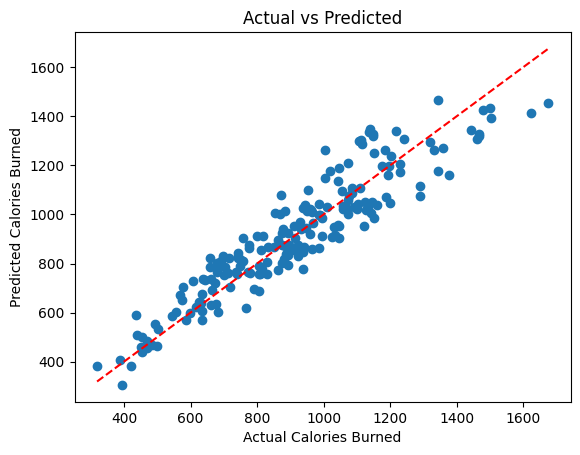

In [144]:
import matplotlib.pyplot as plt

y_pred = pipe.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## Exporting the Model/Pipeline

In [145]:
import pickle as pkl
pkl.dump(pipe,open('model.pkl','wb'))